<a href="https://colab.research.google.com/github/shaoni11/Coursera_Capstone/blob/master/Jobathon_feb_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)
pd.set_option('display.max_columns', 500)

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/data/feb_jobathon_data/train_0OECtn8.csv")
test = pd.read_csv("/content/drive/MyDrive/data/feb_jobathon_data/test_1zqHu22.csv")

In [ ]:
train.drop('row_id',axis='columns', inplace= True)

In [ ]:
test_df = test

In [ ]:
test_df.drop('row_id',axis='columns', inplace= False)

,user_id,category_id,video_id,age,gender,profession,followers,views
0,7986,12,42,14,Male,Student,180,138
1,11278,34,115,14,Male,Student,230,840
2,17245,8,110,44,Female,Working Professional,280,628
3,9851,16,137,18,Male,Student,270,462
4,16008,34,96,47,Female,Other,230,840
...,...,...,...,...,...,...,...,...
11116,26336,25,140,21,Male,Student,240,317
11117,6772,8,100,19,Female,Student,280,628
11118,2042,16,98,22,Male,Student,270,462
11119,24626,8,16,33,Male,Other,280,628


In [ ]:
train['profession'].value_counts()

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64

In [ ]:
train.isnull().sum()

user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [ ]:
train.describe()

,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [ ]:
train.dtypes

user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

In [ ]:
encoder = LabelEncoder()
#Encoding training & testing data
for i in train.columns: # Make a for loops
    if train[i].dtype == 'object': 
        encoder.fit_transform(list(train[i].values)) # Fit transform
        train[i] = encoder.transform(train[i].values) # Transform
         
        for j in train.columns: # Make a for loops again
            if train[j].dtype == 'int':
                train[j] = train[j].astype('float64') # Change the type

for k in test_df.columns: # Make a for loops
    if test_df[k].dtype == 'object': 
        encoder.fit_transform(list(test_df[k].values)) # Fit transform
        test_df[k] = encoder.transform(test_df[k].values) # Transform
         
        for m in test_df.columns: # Make a for loops again
            if test_df[m].dtype == 'int':
                test_df[m] = test_df[m].astype('float64') # Change the type

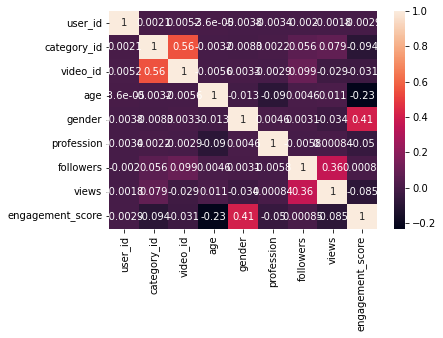

In [ ]:
ax = sns.heatmap(train.corr(), annot=True)

In [ ]:
#lr= LogisticRegression()
Y = train['engagement_score']
X = train.drop(['engagement_score'],axis=1)
X_test =  test_df

In [ ]:
X_test = test_df.drop(['row_id'],axis=1)

In [ ]:
# Standarscaler
scaler = StandardScaler()
#Robust Scaler
#scaler = RobustScaler()
# all columns to all_cols
all_cols = X.columns

# fit scaler
X[all_cols] = scaler.fit_transform(X[all_cols])
X_test[all_cols] = scaler.transform(X_test[all_cols])

In [ ]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,random_state=42,test_size=0.30)

LGBMRegressor

In [ ]:
model = LGBMRegressor(reg_alpha=9.208871583495077, reg_lambda=0.005377048455752813, colsample_bytree= 0.6, subsample= 0.7, learning_rate=0.008,
                      max_depth=10, num_leaves=578, min_child_samples=76, min_data_per_groups=1)

lgb_reg_cv = LGBMRegressor(random_state=42)

params = {
    'learning_rate': [0.005, 0.01, 0.02, 0.03, 0.04, 0.05],
    'max_depth': [3, 5, 8, 10, 12],
    'n_estimators': [100, 250, 400, 500, 700, 800]
}

# randomized search
random_model_lgb = RandomizedSearchCV(estimator=lgb_reg_cv, param_distributions=params, 
                                  n_jobs=-1, cv=4,
                          verbose=2, return_train_score=True)

In [ ]:
random_model_lgb.fit(X_train,Y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
                   param_distributions={'learning_rate': [0.005, 0.01, 0.02,
                                                          0.03, 0.04, 0.05],
                                        'max_depth': [3, 5, 8, 10, 12],
                                        'n_estimators': [100, 250, 400, 500,
                                                         700, 800]},
                   return_train_score=True, verbose=2)

In [ ]:
preds = random_model_lgb.predict(X_val)


In [ ]:
y_lgbm = random_model_lgb.predict(X_test)

In [ ]:
print('R2 Score:',r2_score(Y_val, preds))

R2 Score: 0.3680869582710219


In [ ]:
 test['engagement_score'] = y_lgbm
 test.head(5)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,89198.0,7986.0,12.0,42.0,14.0,1.0,1.0,180.0,138.0,4.151856
1,89199.0,11278.0,34.0,115.0,14.0,1.0,1.0,230.0,840.0,3.621802
2,89200.0,17245.0,8.0,110.0,44.0,0.0,2.0,280.0,628.0,2.688963
3,89201.0,9851.0,16.0,137.0,18.0,1.0,1.0,270.0,462.0,3.872914
4,89202.0,16008.0,34.0,96.0,47.0,0.0,0.0,230.0,840.0,2.607557


In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/data/feb_jobathon_data/sample_submission_JPlpRcN.csv")

In [ ]:
submission['row_id'] = test['row_id']

In [ ]:
submission['engagement_score'] = y_lgbm
submission.to_csv('standardized_hypertuned.csv', index=False)
#submission

In [ ]:
# train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

XGBRegressor

In [ ]:
xgb_reg_cv = XGBRegressor(random_state=42)

params = {
    'learning_rate': [0.005, 0.01, 0.02, 0.03, 0.04, 0.05],
    'max_depth': [3, 5, 8, 10, 12],
    'n_estimators': [100, 250, 400, 500, 700, 800]
}

# randomized search
random_model = RandomizedSearchCV(estimator=xgb_reg_cv, param_distributions=params, 
                                  n_jobs=-1, cv=4,
                          verbose=2, return_train_score=True)

In [ ]:
random_model.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[17:53:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=4, estimator=XGBRegressor(random_state=42), n_jobs=-1,
                   param_distributions={'learning_rate': [0.005, 0.01, 0.02,
                                                          0.03, 0.04, 0.05],
                                        'max_depth': [3, 5, 8, 10, 12],
                                        'n_estimators': [100, 250, 400, 500,
                                                         700, 800]},
                   return_train_score=True, verbose=2)

In [ ]:
preds=random_model.predict(X_val)

In [ ]:
y_test_pred = random_model.predict(X_test)

In [ ]:
print('R2 Score:',r2_score(y_val, preds))

R2 Score: 0.3926949723965789


In [ ]:
submission_df = pd.read_csv("/content/drive/MyDrive/data/feb_jobathon_data/sample_submission_JPlpRcN.csv")

In [ ]:
submission_df['row_id'] = test['row_id']

In [ ]:
submission_df['engagement_score'] = y_test_pred
submission_df.to_csv('xgb_regressor_1.csv', index=False)

RandomForest Regessor


In [ ]:
rf_reg = RandomForestRegressor(random_state=42)

params = {
    'max_depth': [4, 5, 8, 10, 12],
    'min_samples_leaf': [50, 100, 150, 200],
    'n_estimators': [300, 500, 600, 800, 900]
}

random_model_rf = RandomizedSearchCV(estimator=rf_reg, param_distributions=params, 
                                  n_jobs=-1, cv=7,
                          verbose=2, return_train_score=True)

In [ ]:
# fit random model rf
random_model_rf.fit(X_train, y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


KeyboardInterrupt: ignored

In [ ]:
best_model = random_model_rf.best_estimator_
y_test_pred = best_model.predict(X_val)

# evaluation
print('Test Score:',r2_score(y_val, y_test_pred))

Artificial Neural Network

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

In [ ]:
y_pred = ann.predict(X_val)


In [ ]:
test_pred= ann.predict(X_test)

In [ ]:
# evaluation
print('Test Score:',r2_score(y_val, y_pred))

MLP Neural Network, tuning ANN

In [ ]:
mlp_model = MLPRegressor().fit(X_train, y_train)

In [ ]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001],
             "hidden_layer_sizes": [(10,20), (5,5), (100,100) ]}

In [ ]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 5, verbose = 2, n_jobs = -1).fit(X_train, y_train)

In [ ]:
mlp_cv_model.best_params_

In [ ]:
#final
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,100)).fit(X_train, y_train)
y_pred_mlp = mlp_tuned.predict(X_val)

In [ ]:
y_mlp = mlp_tuned.predict(X_test)

In [ ]:
# evaluation
print('Test Score:',r2_score(y_val, y_pred_mlp))

In [ ]:
submission_df['engagement_score'] = y_mlp
submission_df.to_csv('mlp_regressor_1.csv', index=False)